<a href="https://colab.research.google.com/github/XU2024/lab-analysis3/blob/main/Final_LabAnalysis3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As in other assignments, run this first code block to import necessary libraries

In [23]:
# necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import random

#Create your data array

Create a spreadsheet (use google sheets, ms excel, whatever you want) duplicating the table in your lab book. Include a header row. Save the spreadsheet in tab delimited text format as lab3data.txt (Also save a copy in the native format - e.g. .xlsx for excel). If you use google sheets, download a "tab separated value" file then change the ".tsv" extension to ".txt"

**Make sure you use a consistent unit for the energy** IE if the energy change is 2.14 mJ, you could either enter .00214 (units are Joules) or 2.14 (units are mJ) but use the same choice throughout. 

Upload this spreadsheet to your lab3-data-repository (https://github.com/NYUExperimentalPhysics1-2021/lab3-data-repository-yourgithubname) archive on github

Then change the line that starts !wget to use the correct repository name

When you run this, you should see your data displayed

In [1]:
!wget -nc https://raw.githubusercontent.com/NYUExperimentalPhysics1-2021/lab3-data-repository-XU2024/main/lab3data.txt
!more lab3data.txt

--2021-11-22 21:27:01--  https://raw.githubusercontent.com/NYUExperimentalPhysics1-2021/lab3-data-repository-XU2024/main/lab3data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1125 (1.1K) [text/plain]
Saving to: ‘lab3data.txt’

lab3data.txt        100%[===================>]   1.10K  --.-KB/s    in 0s      

2021-11-22 21:27:01 (41.3 MB/s) - ‘lab3data.txt’ saved [1125/1125]

phase	duration(s)	avg.energy(mJ)	#1/2 cycles	elapsed time(s)	lifetime
(sl)(s)	lifetime(amp^2)(s)	energy change(mJ)	coil energy(mJ)	energy l
oss(mJ)	(E.change+E.loss)/coil energy
25	0.007	18.568	340	344.728	680.659	663.429	9.319	21.188	8.952	
0.8623277327
30	0.005	9.131	185	187.587	732.701	698.519	7.958	12.343	2.423	
0.8410435064
30	0.01	13.393	292	296.027	750.789	764.726	11.267	19.4

#Load the data

The load command below assumes you created the 11 columns listed in the lab handout in the order specified,  that the data file is named "lab3data.txt" and that there is one header row.  If that's not right, edit the line below to make it align with what you did. 

In [3]:
phase, duration, avgnrg, numhalfcycles, elapsedtime, lifetime_s, lifetime_asq, deltanrg, coilnrg, nrgloss,coiladj  = np.loadtxt('lab3data.txt', skiprows = 1, unpack=True)

In [4]:
phase, duration, avgnrg, numhalfcycles, elapsedtime, lifetime_s, lifetime_asq, deltanrg, coilnrg, nrgloss, coiladj

(array([25., 30., 30., 30., 35., 35., 35., 40., 40., 40., 45., 45., 45.]),
 array([0.007, 0.005, 0.01 , 0.014, 0.007, 0.01 , 0.014, 0.007, 0.01 ,
        0.014, 0.003, 0.007, 0.014]),
 array([18.568,  9.131, 13.393, 14.098,  7.635,  8.177,  8.976,  6.865,
         7.533,  8.201,  6.009,  6.526,  8.415]),
 array([340., 185., 292., 333., 104., 102., 101., 162., 116., 100., 205.,
        209., 296.]),
 array([344.728, 187.587, 296.027, 337.699, 105.852, 103.316, 102.691,
        164.763, 117.591, 101.245, 207.841, 212.008, 299.879]),
 array([680.659, 732.701, 750.789, 697.374, 625.87 , 628.369, 514.51 ,
        623.645, 680.927, 706.725, 884.671, 779.911, 696.419]),
 array([663.429, 698.519, 764.726, 704.577, 690.352, 666.507, 561.214,
        704.903, 642.833, 733.982, 743.978, 712.628, 646.653]),
 array([ 9.319,  7.958, 11.267,  7.427,  5.554,  7.   ,  8.334,  5.591,
         5.631,  5.487,  1.076,  3.861,  2.57 ]),
 array([21.188, 12.343, 19.419, 14.293,  6.956,  8.589,  9.398,  7.887,

# Make a scatter plot of calculated coil energy vs calculated mechanical energy and fit the data to a line

the total electical energy the pico calculated is stored in `coilnrg`

the change in the bob's energy is stored in `deltanrg`

the calculated energy lost to damping is stored in `nrgloss`

the mechanical energy imparted to the bob is the change in the bob's energy + the energy lost due to damping (for exaample, if you were putting in exactly what was needed to overcome damping, then the bob's energy change would be 0)

1. Please make a scatter plot with the calculated electrical energy on the x-axis and the calculated energy imparted to the bob on the y-axis. Use blue dots. Don't connect the lines. Label the axes. Make sure you specify whether energy is in Joules or milliJoules, etc. 

Now we'd like to know if there's a simple scaling relation between the calculated electrical and mechanical energies. IE mechanical = a * electrical, where maybe a = 80%. 

`np.polyfit(x,y,1)` will fit the data to a line, but the intercept won't necessarily be through 0. Here physics tells us that if the electrical energy is 0, the mechanical energy added must also be 0. So we need to fit the line $y = a x$, not $y = a x + b$. Fortunately, this is a straightfoward problem. The least-squares solution is

$a = \frac{\sum_i x_i y_i}{\sum_i x_i^2}$

2. Find the best (least-squares) fit for the scaling factor. Draw a black dashed line matching this fit through the data. Title the plot with the scaling factor.


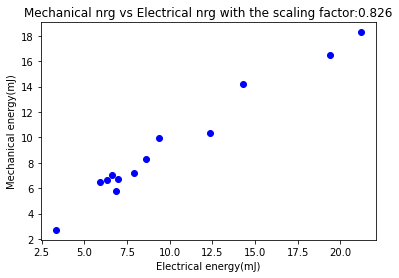

0.8257612298615968

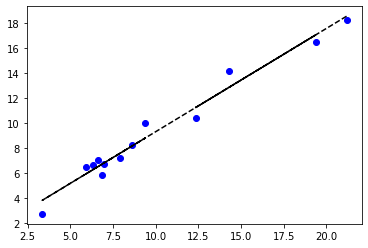

In [38]:
## your answer here
mg=deltanrg+nrgloss
plt.plot(coilnrg, mg, 'bo')
plt.xlabel('Electrical energy(mJ)')
plt.ylabel('Mechanical energy(mJ)')
plt.title('Mechanical nrg vs Electrical nrg with the scaling factor:0.826')
plt.show()

def fitLine(x,y):
  p = np.polyfit(x, y, 1)
  slope = p[0]
  intercept=p[1]
  return (slope, intercept, slope*x + intercept)

x= coilnrg
y=mg
m=sum(coilnrg*mg)/sum(coilnrg**2)
b=0
m,b,yfit = fitLine (x,y)
plt.plot(coilnrg,mg,'bo',coilnrg, yfit,'k--')
m



#Make a scatter plot of calculated coil energy per $\frac{1}{2}$ cycle vs calculated mechanical energy per $\frac{1}{2}$ and fit the data to a line

the same as above, but this time divide all the energies by the number of half cycles (this is the same as the number of pulses).


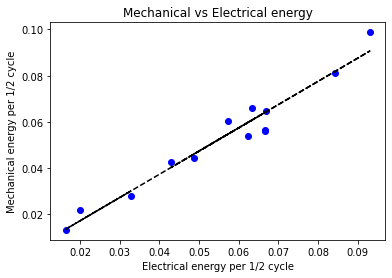

1.0057392467347483

In [128]:
## your answer here
mg0= (deltanrg+nrgloss)/numhalfcycles
coilnrg0= coilnrg/numhalfcycles

x= coilnrg0
y= mg0
m=sum(coilnrg0*mg0)/sum(coilnrg0**2)
b=0
m, b, yfit= fitLine(x,y)
plt.plot(coilnrg0, mg0, 'bo', coilnrg0, yfit, 'k--')
plt.xlabel('Electrical energy per 1/2 cycle')
plt.ylabel('Mechanical energy per 1/2 cycle')
plt.title('Mechanical vs Electrical energy')
plt.show()
m


#Look for systematics

If everything is going well, we wouldn't expect the scaling to depend on things like the size of the pulse or what fraction of the energy is lost to damping. 

1. remake the scatter plot above (per half cycle), including the fit line, but this time use a blue marker if the per energy pulse is above the median (top half) and a red marker if the per energy pulse is below he median (bottom half)

2. Make a new figure. remake the scatter plot above (per half cycle), including the fit line, but this time use a blue marker if the ratio of energy loss to total energy change is above the median (top half) and a red marker if the per energy pulse is below he median (bottom half)

hint: [you can use true/false arrays to index another array](https://numpy.org/doc/stable/user/basics.indexing.html#boolean-or-mask-index-arrays) For instance if x and y are numpy arrays of the same size, `y[x<10]` gives you all values of `y` for which `x < 10`.



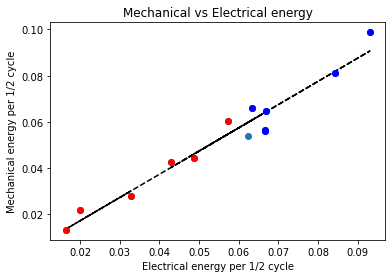

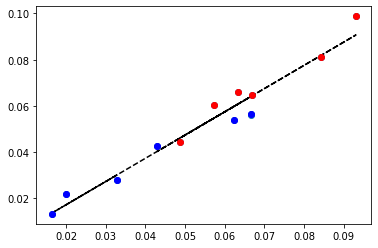

In [129]:
## your code here
mg0= (deltanrg+nrgloss)/numhalfcycles
coilnrg0= coilnrg/numhalfcycles


x= coilnrg0
y= mg0
m=sum(coilnrg0*mg0)/sum(coilnrg0**2)
b=0
m, b, yfit= fitLine(x,y)
plt.plot(coilnrg0, mg0,'o', coilnrg0, yfit, 'k--')
plt.xlabel('Electrical energy per 1/2 cycle')
plt.ylabel('Mechanical energy per 1/2 cycle')
plt.title('Mechanical vs Electrical energy')

M=np.median(x)
x1 = x[x<M]
x2 = x[x>M]
y1 = y[x<M]
y2 = y[x>M]

plt.plot(x1, y1, 'ro')
plt.plot(x2, y2, 'bo')
plt.show()

plt.plot(x,y,'o',x,yfit,'k--')
rt=nrgloss/deltanrg
M1=np.median(rt)
x10 = x[rt<M1]
x20 = x[rt>M1]
y10 = y[rt<M1]
y20 = y[rt>M1]
plt.plot(x10,y10,'ro')
plt.plot(x20,y20,'bo')
plt.show()

## Question - answer below

Is there a pattern to either of these scatter plots? Is one data type consistently above the fit line and the other below it, or are they all spread out?

In my graph, they all spread out. However, with respect to ration of energy loss to change of energy, it seems that when the ratio is below its median, the date is above the line.

#Plot the residuals

Make the scatter plot per half cycle again, but this time subtract the linear fit from the y-data. So you should have a plot of $(x, y-ax)$ where $x$ is the calculated electrical energy, $y$ is the calculated mechanical energy added, and $a$ is the best-fit scaling factor

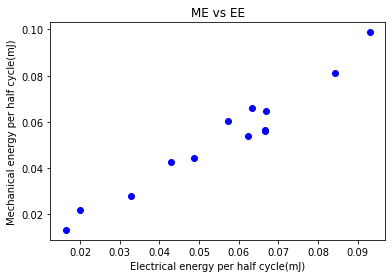

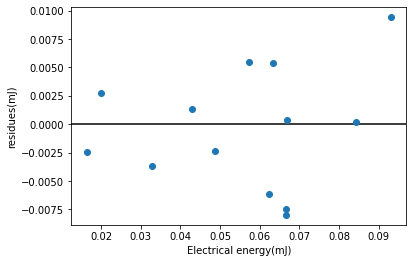

In [127]:
## your code here
y=mg0=(deltanrg+nrgloss)/numhalfcycles
x=coilnrg/numhalfcycles
plt.scatter(x,y, c='blue')
plt.xlabel('Electrical energy per half cycle(mJ)')
plt.ylabel('Mechanical energy per half cycle(mJ)')
plt.title("ME vs EE")
plt.show()

a=sum(x*y)/sum(x**2)
y_pred=a*x
plt.errorbar(x, y-y_pred,marker='o', fmt='d' )
plt.xlabel('Electrical energy(mJ)')
plt.ylabel('residues(mJ)')
plt.axhline(y=0,c='black')
plt.show()



#Make a histogram of fractional error

1. Make a histogram of the fractional error: $\frac{y - ax}{y}$, where $x$ is the calculated electrical energy, $y$ is the calculated mechanical energy added, and $a$ is the best-fit scaling factor

2. Calculate the root mean square fractional error (that is $\sqrt{\frac{1}{N}\sum_i (\frac{y_i - ax_i}{y_i})^2}$. Why did I tell you to use this instead of the standard deviation? What's the difference?

The root mean square fractional error is: 0.17729775391309424


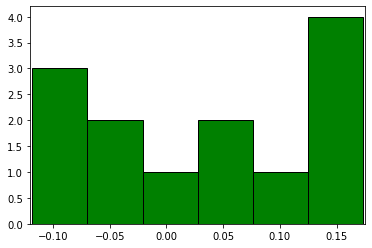

In [170]:
##your answer here
y=mg=deltanrg+nrgloss
x=coilnrg
a=sum(x*y)/sum(x**2)
fe=(y-a*x)/y
plt.hist(fe,bins=6,alpha=1,color='green',edgecolor='black',label='fractional error')
plt.xlim(-0.12,0.175)

rms= np.sqrt(sum(fe)/len(x))
print('The root mean square fractional error is:', rms)

The standard deviation is based on the difference between data and its mean to measure the variabily, and root mean square fractional error is based on the difference between actual value and its predicted value. When comes to high error,which means distance between actual value and predicted value is large, the RMSFE could reflect it.

# Analysis

1. Can the electrical energy be used to measure the mechanical energy imparted to the bob?

Probabily can. Although the data are not in a perfect fit line, but they are very close to the fit line by surround it closely. In general, we could see there is definitely a linear function appearing from the graph, so it almost satisfies a linear function that is the mechanical energy is about 82.57% of the electrical energy.
2. How accurately do you think we can estimate the amount of energy added? What limits this accuracy?

Very accurate. The root mean square fractional error is about 0.177, which is very small, which means the error is very small, so it is accurate to estimate mechanical energy added.
3. Do you see any evidence of systematic errors? If so, what do you see? What might you do to correct these? 

No, my data is quite close to the function. There is no general error which related to many data here.